![](../images/FE_00.png)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('Womens_Clothing_E_Commerce_Reviews').getOrCreate()

In [4]:
train = spark.read.parquet("../data/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews_resampling.parquet")

In [5]:
train = train.withColumnRenamed('Rating', 'label')

In [6]:
test = spark.read.parquet("../data/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews_test.parquet")

In [7]:
test = test.withColumnRenamed('Rating', 'label')

## 9.2. Naive Bayes
### 9.2.1. Build model

In [8]:
from pyspark.ml.classification import NaiveBayes

In [9]:
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

In [10]:
nb_model_0 = nb.fit(train)

### 9.2.2. Đánh giá model
#### 9.2.2.1. Trên test

In [11]:
test_res_0 = nb_model_0.transform(test)

In [12]:
test_res_0.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(14162,[0,1,2,3,4...|    5|[-1676.7057515145...|[8.39101555109699...|       3.0|
|(14162,[0,1,2,3,4...|    5|[-1856.6881735394...|[4.39386047452588...|       4.0|
|(14162,[0,1,2,3,5...|    5|[-1283.3399446532...|[8.11503987548914...|       3.0|
|(14162,[0,1,2,3,5...|    5|[-1277.1642037383...|[7.37214745337575...|       2.0|
|(14162,[0,1,2,3,5...|    4|[-1314.2667068454...|[1.57531081489618...|       4.0|
|(14162,[0,1,2,3,5...|    4|[-1553.6529283030...|[3.96208720689409...|       4.0|
|(14162,[0,1,2,3,5...|    3|[-779.07099133473...|[4.40157776034669...|       3.0|
|(14162,[0,1,2,3,5...|    4|[-553.95916241413...|[5.34878684498331...|       3.0|
|(14162,[0,1,2,3,5...|    4|[-991.14624224345...|[2.15866836776853...|       3.0|
|(14162,[0,1,2,3

#### 9.2.2.2. Confusion matrix

In [13]:
cm = test_res_0.groupBy('label', 'prediction').count()

In [14]:
from modules.utils import confusionMatrix

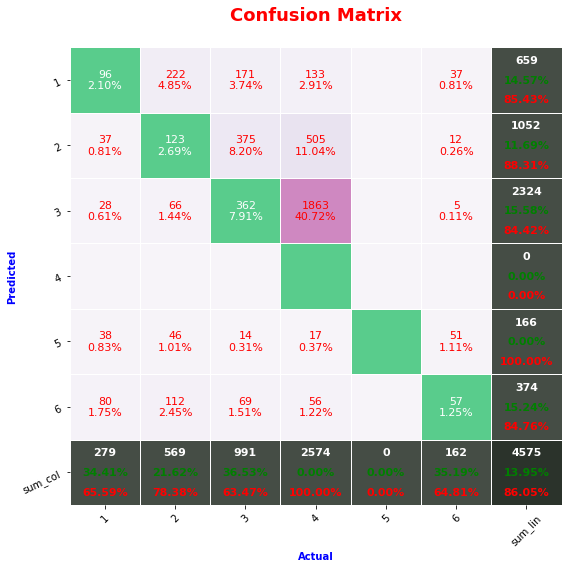

In [15]:
confusionMatrix(cm)

#### 9.2.2.3. Đánh giá bằng các metric

In [16]:
from modules.utils import classifierMultiEvaluator

In [17]:
classifierMultiEvaluator(test_res_0)

,0
Accuracy,0.139454
F1-Score,0.086197
Precision,0.062563
Recall,0.139454


> **Nhận xét:**
> * Còn tệ hơn là dùng Logistic nữa